# Parallelizing Neural Network Training with TensorFlow

- Since its release in __ November 2015, __ TensorFlow has gained a lot of popluarity among machine learning researcher.
- While TensorFlow can be considered a low-level deep learning library, simplifying API such as Keras have been developed that make the construction of common deep learning models even  convenient.

- TensorFlow can speed up our machine learning tasks significantly. 



### TensorFlow and training peformance.

![Price and no. of cores comparison of cpu and gpu](cpv_vs_gpu.png)

(Date august 2017)

At 70 perent of the price of a modern CPU, we got a GPU that has __ 450 times more cores__ and is capable of around __15 times__ more floating-point calcualtiongs per second. So what is holding us back from utilizing GPUs for our machine learning tasks?

The challenge is that writing code to target GPUs is not as simple as executing Python code in our interpreter. There are special packages, such as __ CUDA and openCL, that allow us to target the GPU.__ However , writing code in CUDA or OpenCL  is probably not the most convenient environment for implemeting and running machine leanring algorithms. The good news is that this is what TensorFlow was developed for!

## What is TensorFlow?

<font style="color:#aa2eb3">TensorFlow is a scalable and multiplatform programming interface for implementing and running machine learning algorithms, including convenience wrapper for deep learning </font>

To improve the performance of training machine learning models, TensorFlow allows execution on both CPUs and GPUs. However its greatest perforamcne capabilities can be discovered using GPUs.

<font style="color:#aa2eb3">TensorFlow computations rely on constructiong a directed graph for representing the data flow. Even though building the graph may sound complicated, TensorFlow comes with high-level APIs that has made it very easy.</font>

We start with low-level TensoFlow API. while implemeting models at this level can be alittle bit cumberosme at first, lthe advantage of the low-level API  si taht it gives us mor frelixbility as progammers to comne the basic oprations and evelp complex macine learning modesl. 

Starting TensorFlow 1.1.0 high level APIs are added on top of the low-level API(the so-called Layers and Estimators), which allows building and prototyping models much faster.

<font style="color:#e6020e">TensorFlow is built around a computation graph composed of a set of nodes. Each node represents an operation that may have zero or more input or output. The values that flow through the edges of the computation graph are called __tensors__</font>

__Tensors__ can be understood as a __generalization of scalars, vectors, matrices and so on.__ More concretely, ascalar can be dfined as a rank-0 tensor, a vector as a rank-1 tensor, a matrix as a rank-2 tensor, and matrices stacked in a third dimension as rank-3 tensors.

<center> $ z \space = \space w \space X \space x + b$</center>

In [22]:
import tensorflow as tf

# Create a graph
g = tf.Graph()
with g.as_default():
    x = tf.placeholder(dtype = tf.float32, shape =(None), name='input_x')
    w = tf.Variable(2.0, name='weight')
    b = tf.Variable(1.0, name='bias')
    z = tf.add(tf.multiply(w,x) ,b )

with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    for t in [1.0,0.6,-1.8]:
        print(' x= %4.1f --> z = %4.1f' %(t, sess.run(z, feed_dict={x:t})))
    

# print(result)

 x=  1.0 --> z =  3.0
 x=  0.6 --> z =  2.2
 x= -1.8 --> z = -2.6


- In general, when we develp a model in the TensorFlow low-level API, we need to define placeholders for iinput data(x, y, and sometimes other tunable parameters); then , define the weight matrices and build the model form input to ouptut.
- It this is an optimization problem we should degine the loss or csot ffunciton and etermine which optimation algorithm to use.

- TensorFlow will create a graph that contains all the sumbols that we have defined as nodes in this graph.

In [23]:
with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(z, feed_dict={x: [1.0, 0.6, -1.8]}))


[ 3.          2.20000005 -2.5999999 ]


> Official TensorFlow style gid recommend usign tow-characer spacing for code indents. However here we chose foru character for inetns as it sis more cosnistent with tht officila PYthon style guide and aslo help sin displayig the code syntax higlighting in many text editors correctly as well as the accompanying Jupyter code notebooks

### Working with array structures:
Let's dicuss how to use array sturctures in TensorFlow. By executing the following code , we wil crate a simpler rank-3 tensor of size _batchsizex2x3_ , reshape it, and calcuate the column sums using TensorFlow's optmized expressions.  since we don't know the bactch size a priori, we specify _NOne_ for the batch size in the argument for the _shape_ parameter of the placeholder _z_.

In [28]:
import numpy as np

g = tf.Graph()
with g.as_default():
    x = tf.placeholder(dtype=tf.float32, shape=(None,2,3), name='input_x')
    x2 = tf.reshape(x, shape=(-1,6),name='x2')
    
    ## Calculate the sum of each columns
    xsum = tf.reduce_sum(x2, axis=0, name='col_sum')
    
    ## Calculate the mean of each columns
    xmean = tf.reduce_mean(x2, axis=0, name='col_mean')
    
with tf.Session(graph=g) as sess:
    X_array = np.arange(18).reshape(3,2,3)
    
    
    print('input shape : ', X_array.shape)
    print('Reshape \n', sess.run(x2, feed_dict={x:X_array}))
    print('Column Sums : \n', sess.run(xsum, feed_dict={x:X_array}))
    print('Columns Means: \n', sess.run(xmean, feed_dict={x:X_array}))
    
    

input shape :  (3, 2, 3)
Reshape 
 [[  0.   1.   2.   3.   4.   5.]
 [  6.   7.   8.   9.  10.  11.]
 [ 12.  13.  14.  15.  16.  17.]]
Column Sums : 
 [ 18.  21.  24.  27.  30.  33.]
Columns Means: 
 [  6.   7.   8.   9.  10.  11.]


- we worked with three function  tf.reshape, tf.reduce_sum , tf.reduce_mean . When reshaping a tensor, if you use -1 for a specfic dimension, the size of the that diemsion will be compute daccoridng to the total size ofthe esnor andthe remaining dismension.
- Therefore _tf.reshape(tensor, shape=(-1,))_ can be used to flatten a tensor.

### Developing a simple model with the low-level TensorFlow API

Let's implemen _ordingary Least Square_

In [1]:
import tensorflow as tf
import numpy as np

In [2]:

X_train = np.arange(10).reshape((10,1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0])

# Given the dataset, we want to train a linear regression model to predict the output y from the input x.

class TfLinreg(object):
    def __init__(self, x_dim, learning_rate=0.01, random_seed=None):
        self.x_dim = x_dim
        self.learning_rate = learning_rate
        self.g = tf.Graph()
        
        ## Build the model
        with self.g.as_default():
            ## set graph-level; random -seed
            tf.set_random_seed(random_seed)
            
            self.build()
            ## create initializer
            self.init_op = tf.global_variables_initializer()
            
    def build(self):
        ## define placeholders for inputs
        self.X = tf.placeholder(dtype=tf.float32,
                               shape=(None,self.x_dim),
                               name='x_input')
        self.y = tf.placeholder(dtype=tf.float32,
                               shape=(None),
                               name='y_input')
        
        print(self.X)
        print(self.y)
        ## define weight matrix and bias vector
        w = tf.Variable(tf.zeros(shape=(1)), name='weight')
        b = tf.Variable(tf.zeros(shape=(1)), name='bias')
        print(w)
        print(b)
        
        self.z_net = tf.squeeze(w*self.X + b, name='z_net')
        print(self.z_net)
        
        sqr_errors = tf.square(self.y - self.z_net, name='sqr_errors')
        print(sqr_errors)
        
        self.mean_cost = tf.reduce_mean(sqr_errors, name='mean_cost')
        
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=self.learning_rate, name='GradientDescent')
        self.optimizer = optimizer.minimize(self.mean_cost)

In [3]:
lrmodel = TfLinreg(X_train.shape[1], learning_rate=0.01)

Tensor("x_input:0", shape=(?, 1), dtype=float32)
Tensor("y_input:0", dtype=float32)
<tf.Variable 'weight:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'bias:0' shape=(1,) dtype=float32_ref>
Tensor("z_net:0", dtype=float32)
Tensor("sqr_errors:0", dtype=float32)


In [5]:
def train_linreg(sess, model, X_train, y_train, num_epochs=10):
    ## Initialize all vairbles : W and b
    sess.run(model.init_op)
    
    
    training_cost = []
    for i in range(num_epochs):
        _, cost = sess.run([model.optimizer, model.mean_cost], 
                          feed_dict={model.X:X_train, model.y:y_train})
        training_cost.append(cost)
    return training_cost

In [15]:
sess = tf.Session(graph=lrmodel.g)

training_costs = train_linreg(sess, lrmodel, X_train, y_train)

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

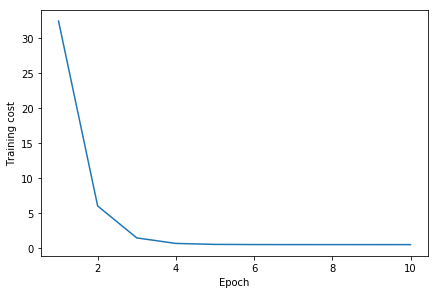

In [17]:
plt.plot(range(1, len(training_costs) + 1), training_costs )
plt.tight_layout()
plt.xlabel('Epoch')
plt.ylabel('Training cost')

plt.show()

This simple model converges very quickly after a few epochs. Looking a the cost funciton, it seems that we buld a working regression model form this particular dataset.

In [22]:
def predict_linreg(sess, model, X_test):
    y_pred = sess.run(model.z_net, feed_dict={model.X:X_test})
    return y_pred

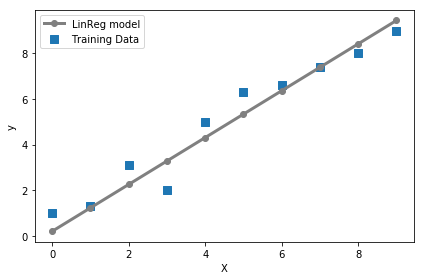

In [28]:
plt.scatter(X_train, y_train, marker='s', s=50, label='Training Data')
plt.plot(range(X_train.shape[0]), predict_linreg(sess, lrmodel, X_train), color='gray', marker='o',
        markersize=6, linewidth=3, label='LinReg model')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()

### Training Neural Network efficiently with high-level TensorFlow APIs

In this section we will look at 2 high-level APIs - the layer API (_ tensorflow.layers_ or _tf.layers_) and the keras API (_tensorflow.contrib.keras_)

## Building multilayer neural networks using TensorFlow's Layers API

let's implement a multilayer percptron to classify the handwritten digits form the MNIST dataset, 

In [29]:
from tensorflow.examples.tutorials.mnist import input_data


In [31]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [43]:
!gzip ./MNIST_data/*ubyte.gz -d

In [33]:
import os
import struct
import numpy as np

def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte' % kind)    
    
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
#         print(magic, n)
        labels = np.fromfile(lbpath, dtype = np.uint8)
    
    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack('>IIII', imgpath.read(16))
#         print(magic, num, rows, cols)
        images =np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), 784)
        images = ((images / 255.) - .5)*2
    
    return images, labels

In [44]:
X_train, y_train = load_mnist('MNIST_data/', kind='train')

print('Rows %d, Columns: %d'%(X_train.shape[0], y_train.shape[0]))

Rows 60000, Columns: 60000


In [45]:
X_test, y_test = load_mnist('MNIST_data/', kind='t10k')
print('Rows: %d, columns: %d' %(X_test.shape[0], X_test.shape[1]))

Rows: 10000, columns: 784


In [47]:
## Mean Centering and normalization

mean_vals = np.mean(X_train, axis=0)
std_val = np.std(X_train)

X_train_centered = (X_train - mean_vals)/std_val
X_test_centered = (X_test - mean_vals)/std_val


del X_train, X_test

print(X_train_centered.shape, y_train.shape)
print(X_test_centered.shape, y_test.shape)


(60000, 784) (60000,)
(10000, 784) (10000,)


In [ ]:
np.savez_compressed('mnist_centered.npz',
                    X_train=X_train_centered,
                   y_train=y_train,
                   X_test=X_test_centered,
                   y_test=y_test)

In [2]:
mnist = np.load('mnist_centered.npz')
X_train_centered = mnist['X_train']
y_train = mnist['y_train']
X_test_centered = mnist['X_test']
y_test = mnist['y_test']

In [13]:
# Now we can start building our mode. We will start 
# by crating two placeholder,s named _tf-x_ and _tf-y_ , but with threee fully connected layers.

n_features = X_train_centered.shape[1]
n_classes = 10
random_seed =123
np.random.seed(random_seed)

g = tf.Graph()
with g.as_default():
    tf.set_random_seed(random_seed)
    tf_x = tf.placeholder(dtype=tf.float32, shape=(None,n_features), 
                         name='tf_x')
    tf_y = tf.placeholder(dtype=tf.int32, shape=None, name='tf_y')
    
    y_onehot = tf.one_hot(indices=tf_y, depth=n_classes)
    
    h1 = tf.layers.dense(inputs=tf_x, units=50, activation=tf.tanh, name='layer1')
    h2 = tf.layers.dense(inputs=h1, units=50, activation=tf.tanh, name='layer2')
    
    logits = tf.layers.dense(inputs=h2, units=10, activation=None, name='layer3')
    
    predictions = {
        'classes': tf.argmax(logits, axis=1, name='predicted_classes'),
                  'probabilities': tf.nn.softmax(logits, name='softmax_tensor')
    }
    
## define cost funciton and optimizer:
with g.as_default():
    cost = tf.losses.softmax_cross_entropy(onehot_labels=y_onehot, logits=logits)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

    train_op = optimizer.minimize(loss=cost)

    init_op  = tf.global_variables_initializer()
    

In [16]:
## Generator implementatio for : batch generation.

def create_batch_generator(X,y, batch_size=128, shuffle=False):
    X_copy = np.array(X)
    y_copy = np.array(y)
    if shuffle:
        data = np.column_stack((X_copy, y_copy))
        np.random.shuffle(data)
        X_copy = data[:,:-1]
        y_copy = data[:,-1].astype(int)
    for i in range(0, X.shape[0], batch_size):
        yield (X_copy[i:i+batch_size, :], y_copy[i:i+batch_size])

In [17]:
## crate a session to launc the graph
sess = tf.Session(graph=g)

## runt the varible intialization operaor
sess.run(init_op)


## 50 epoch of traning:
for epoch in range(50):
    training_costs = []
    batch_generator = create_batch_generator(X_train_centered, y_train, shuffle=True)
    for batch_x, batch_y in batch_generator:
        ## prepare a dict to feed data to oru network:
        feed = {tf_x:batch_x, tf_y:batch_y}
        _, batch_cost = sess.run([train_op, cost], feed_dict=feed)
        training_costs.append(batch_cost)
    print(' --- Epoch %2d Avg. Training Loss : %.4f' %(epoch+1, np.mean(training_costs)))

 --- Epoch  1 Avg. Training Loss : 0.8969
 --- Epoch  2 Avg. Training Loss : 0.4567
 --- Epoch  3 Avg. Training Loss : 0.3654
 --- Epoch  4 Avg. Training Loss : 0.3193
 --- Epoch  5 Avg. Training Loss : 0.2895
 --- Epoch  6 Avg. Training Loss : 0.2678
 --- Epoch  7 Avg. Training Loss : 0.2508
 --- Epoch  8 Avg. Training Loss : 0.2367
 --- Epoch  9 Avg. Training Loss : 0.2249
 --- Epoch 10 Avg. Training Loss : 0.2146
 --- Epoch 11 Avg. Training Loss : 0.2057
 --- Epoch 12 Avg. Training Loss : 0.1976
 --- Epoch 13 Avg. Training Loss : 0.1903
 --- Epoch 14 Avg. Training Loss : 0.1838
 --- Epoch 15 Avg. Training Loss : 0.1777
 --- Epoch 16 Avg. Training Loss : 0.1721
 --- Epoch 17 Avg. Training Loss : 0.1668
 --- Epoch 18 Avg. Training Loss : 0.1619
 --- Epoch 19 Avg. Training Loss : 0.1574
 --- Epoch 20 Avg. Training Loss : 0.1531
 --- Epoch 21 Avg. Training Loss : 0.1490
 --- Epoch 22 Avg. Training Loss : 0.1452
 --- Epoch 23 Avg. Training Loss : 0.1416
 --- Epoch 24 Avg. Training Loss :

In [18]:
## Do prediction on the test set:
feed = {tf_x: X_test_centered}

y_pred = sess.run(predictions['classes'], feed_dict=feed)

print('Test Accuracy %.3f'  %(100* np.sum(y_pred == y_test)/y_test.shape[0]))

Test Accuracy 95.820


## Developing a multilayer neural network with Keras

The development of kears stated in the ealru  months of 2015. Today it is one of the most popular and widely used libraties that is buildt  on top of Theano and TensorFlow.

- One of the prominent featuers is that it has a very intuitive and user-friendly APT, which allows us to implement neural networks in only a few lines of code.




In [20]:
import tensorflow as tf
import tensorflow.contrib.keras as keras


np.random.seed(123)
tf.set_random_seed(123)

In [22]:
# To continue witht eperpatation of the training data, we need to conver the class labesl (intergers0-9) 
# into the one-hot format. 

y_train_onehot = keras.utils.to_categorical(y_train)

print('First 3 labels : ', y_train[:3])


print('\n First 3 labes (one_hot) \n' , y_train_onehot[:3,:])

First 3 labels :  [5 0 4]

 First 3 labes (one_hot) 
 [[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


Now  we can get to tjhe interesting part and implemet a neural network, Briefly, we will have three layers, where the first two layers each have 50 hidden units with the _tanh_ activation function and the last layer has 10 units for the 10 class labesl and uses _softmax_ to give the probaility of each class.

In [23]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(units=50,activation='tanh',input_dim=X_train_centered.shape[1]))

model.add(keras.layers.Dense(units=50, activation='tanh', input_dim=50))

model.add(keras.layers.Dense(units=y_train_onehot.shape[1], activation='softmax', input_dim=50))

sgd_optimizer = keras.optimizers.SGD(lr=0.001, momentum=.9, decay=1e-7)

model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy')

First, we initializse a new model using the _Sequential_ class to implement a feedforward neural network. Then ,we can add as may layert ot it as we like.<br>
- However, since the first layer that we add is the input layer, we have to make sure that the _input-dim_ attribute matches the number of features(columns) in the training set(here 784)
<br>
- Also we have to make sure that the number of output units (_units_) and input units (_input-dim_) of two consecutive layers mathc. In the preceding example, we added two hideen layers with 50 hidden units plus one bias unit each. The number of units in the output layer should be equal to the number of unique class labesl -- the number of columns in the one-hot-encoded class label array.

- Before we can compile our model, we aslo have to define an optimizer. In the preding example, we hose a stchastic gradient descent optimization, whic we are already familliar with from previous chaptes, we set the cpst (or loss) funciton to _categorical-crossentropy_.


- The binary cross-entropy is just a techical term for the cost funciton in the logistic regression, and the categorical cross-entropy is its generalization for multiclass prediction via softmax.  

> We used a new intiialization algorithm for weight matrices by setting _kernel-initializer='glorot\_uniform_'  by default.  Glorot initialization (also know as Xavier initialization) is a more robuts way ot initalization for deep neural networks.

In [24]:
history = model.fit(X_train_centered, y_train_onehot,
                    batch_size=64, epochs=50,
                    verbose=True, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 4s - loss: 0.7247 - val_loss: 0.3616
Epoch 2/50
54000/54000 [==============================] - 3s - loss: 0.3718 - val_loss: 0.2815
Epoch 3/50
54000/54000 [==============================] - 3s - loss: 0.3087 - val_loss: 0.2447
Epoch 4/50
54000/54000 [==============================] - 3s - loss: 0.2728 - val_loss: 0.2216
Epoch 5/50
54000/54000 [==============================] - 3s - loss: 0.2475 - val_loss: 0.2042
Epoch 6/50
54000/54000 [==============================] - 3s - loss: 0.2277 - val_loss: 0.1918
Epoch 7/50
54000/54000 [==============================] - 3s - loss: 0.2115 - val_loss: 0.1810
Epoch 8/50
54000/54000 [==============================] - 3s - loss: 0.1979 - val_loss: 0.1719
Epoch 9/50
54000/54000 [==============================] - 3s - loss: 0.1860 - val_loss: 0.1646
Epoch 10/50
54000/54000 [==============================] - 3s - loss: 0.1758 - val_loss: 0.1591


The _validation-split_ parameter is especally handy since tiwll reserve 10 % of the training data(here 6000 samples) for validation after__each epoch_ so that we can mointor whether the model is overfitting during training:

In [26]:
y_train_pred = model.predict_classes(X_train_centered, verbose=0)
print('First 3 predictions ', y_train_pred[:3])

First 3 predictions  [5 0 4]


In [30]:
# predicting the probabilities
y_traing_proba = model.predict_proba(X_train_centered, verbose=0)

y_traing_proba[:3,:]

array([[  4.71565982e-05,   5.97541337e-04,   1.47282815e-04,
          3.38414669e-01,   5.71595571e-08,   6.59369588e-01,
          1.61520584e-05,   6.08128263e-04,   3.87391628e-05,
          7.60653464e-04],
       [  9.99917269e-01,   1.00162447e-06,   1.89916664e-05,
          3.55255088e-06,   3.59191688e-07,   2.55292616e-05,
          2.05055630e-06,   4.14505485e-06,   2.91263314e-06,
          2.41696744e-05],
       [  6.18520016e-06,   1.77971931e-04,   4.03145561e-04,
          3.20039876e-03,   9.92191255e-01,   1.04643914e-05,
          1.01812102e-03,   2.16930569e-03,   5.41081317e-05,
          7.69073085e-04]], dtype=float32)

In [34]:
# FINALLY let's print the model accuracy on traing and test sets

correct_preds = np.sum(y_train == y_train_pred)
train_acc = correct_preds/y_train.shape[0]

print('First 3 predictions ', y_train_pred[:3])

print('Trainig accuracy : %.2f%%' % (train_acc*100))


y_test_pred = model.predict_classes(X_test_centered, verbose=0)
correct_preds = np.sum(y_test_pred == y_test)
test_acc = correct_preds/y_test.shape[0]

print('Test accuracy : %.2f%%' % (test_acc*100))


First 3 predictions  [5 0 4]
Trainig accuracy : 98.88%
Test accuracy : 96.04%


### Choosing activation functions for multilayer networks

- Technically, we can use any function as an acitvation function in mulitlayer neural etowrks as long as it is differetiable. We can even use linear activation  functions, such as in Adaline.
- In practice, it would not be very useful to use linear activation functions for both hidden and output layers since we want to introduce nonlinearity in a typical artificial neural network to be able ot tackle comples problems.

- The ___logistict function__ we used probably mimics the concept of a neureon in a brain most closely -- we can think of it as the probaility of whether a neuraon fires or not_
- However, logistic activation functions can be problematic if we have higly negative input since the output of the sigmoid function ___return output__ that are close to __zero___, the neural network would __learn very slowly and it becomes more likely that it gets trapped in the local minima during training__. This is why people often prefer a hyperbolic tangent as an activation function in hidden layers.

### Logistic function recap

The logistic function often just called the sigmoid function, is in fact a special case of a sigmoid function

- Recall that we can se a logistic function to modelthe probability that sample _x_ belings ot the positive class (class 1 ) in a binary classification task. The net given net input _z_ is shown in the follwing equaiton:

<center>$ z = w_0x_0 + w_1x_1 + w_2x_2 + .... + w_mx_m \space = \space \sum_{i=0}^{m}w_ix_i \space = \space w^Tx $</center>

The logistic function will comput the follwing:
<center>$ \phi_{logistic}(z) \space = \space \frac {1}{1+e^{-z}} $</center>
 
Note that $w_0$ is the bias unit (y-axis intercept, which means $x_0$ =1)

For MNIST data classification task, we used one-hot encoidng technique to compute the values in the output layer consisting of multiple logistic activation units.
- However, as we will demonstrate with the following code example, an output layer cosisting of multiple logistic actvation units does not produce meaningful, interpretable porbaility values

In [48]:
def net_input(X, W):
    return np.dot(X,W)

def logistic(z):
    return 1.0 /(1.0 + np.exp(-z))

def logistic_activation(X, W):
    z = net_input(X,W)
    return logistic(z)

In [51]:
# W : array with shape = (n_output_units  n_hidden_units +1)
# Note that the first column are the bias units

W = np.array([[1.1, 1.2, 0.8, 0.4],
             [0.2, 0.4, 1.0, 0.2],
             [0.6, 1.5, 1.2, 0.7]])

# A : data array with shape = (n_hidden_units +1, n_samples)
# Note that the first column of this array must be 1

A = np.array([[1, 0.1, 0.4, 0.6]])

Z = np.dot(W, A[0])
y_probas = logistic(Z)


print('Net input "\n', Z)

print('Output Units: \n', y_probas)

Net input "
 [ 1.78  0.76  1.65]
Output Units: 
 [ 0.85569687  0.68135373  0.83889105]


We can see in the output, the __resulting values can not be interpeted as probabilities for a three -class problem.__ The __reason for this is that they do not sum up to 1. __
However, this is in ffact not abig concern if we only use our model to predict the class labes, not the class membership probailities. 
- One way to preidct the class label form the output units obtianed earlier is touse the maximum value:

In [54]:
y_class = np.argmax(y_probas, axis=0)
print('Predicted class label : %d ' %y_class)

Predicted class label : 0 


In certain contexts, it cna be useful to ocmpute meangful class probabilities for mulitclass predicitons.

### Estimating class probailiities in multiclass classification via the softmax function

- The _softmax_ functio is in fact a soft form of the _argmax_ (observered above) function; instead of givieng a single class index, it provides the probaility of each class. Therefore it allows us to compute  meaningful class porbabilities in multiclass settings( multinomial logistic regression)


In _softmax_, the porbaility of a particular sample with net input _z_ belonging to the ith class can be computed with a normalization term in the denominator, that is the sum of all _M_ linear funcitons:

<center>$ p(y=i \space |\space z) \space = \space \phi (z) = \frac {e^{z_i}}{\sum_{j=1}^{M} \space \space e^{z_j}} $ </center>

In [56]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

y_probas = softmax(Z)
print('Probabilities : \n', y_probas)

np.sum(y_probas)

Probabilities : 
 [ 0.44668973  0.16107406  0.39223621]


1.0

As we can see, the predicted class probabilities now sum up to 1, as we would expect. It is also ntable that the predicted class label is the same as wehn we applied the _argmax_ funciton to the logistic output. Intuitivelyu, it may help to think of the _softmax_ funciton as a _normalized_ output that is useful to obtain meaningful class-membership predicitons in multiclass settings.

### Broadening the output spectrum using a hyperbolic tangent

another sigmoid function that is often used in the hidden layer of aritificial nueral networks is the __hyperbolic tangent__ (commonly known as __tanh__), which can be interpreted as a rescaled versoin of the logistic functions:

<center>$ \phi_{logistic}(z) \space = \space \frac {1}{1+e^{-z}} $</center>

<center>$ \phi_{tanh}(z) \space = \space 2 \space x \space \phi_{logistic}(2z) -1 = \frac {e^z \space - \space e^{-z}}{e^z \space + \space e^{-z}}  $</center>

The ___advantage of the hyperbolic tangent over the logistic function is that it has broader output spectrum and ranges in the open interval (-1, 1),___ which can improve the convergence of the back progpagation alogrithm.
<br>
In contrast, the logistic funciton returns a n output signal that ranges in the open interval (0,1).

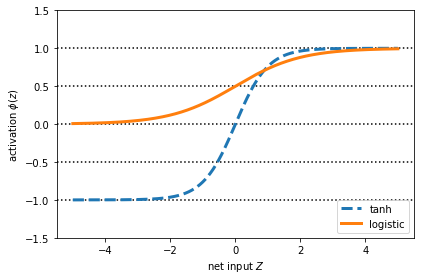

In [60]:
def tanh(z):
    e_p = np.exp(z)
    e_n = np.exp(-z)
    
    return (e_p - e_n) / (e_p + e_n)


z = np.arange(-5, 5, 0.005)
log_act = logistic(z)
tanh_act = tanh(z)


plt.ylim([-1.5,1.5])
plt.xlabel('net input $Z$')
plt.ylabel('activation $\phi(z)$')
plt.axhline(1, color='black', linestyle=':')
plt.axhline(0.5, color='black', linestyle=':')
plt.axhline(0, color='black', linestyle=':')
plt.axhline(-0.5, color='black', linestyle=':')
plt.axhline(-1, color='black', linestyle=':')

plt.plot(z, tanh_act, linewidth=3, linestyle='--', label='tanh')
plt.plot(z, log_act, linewidth=3,  label='logistic')

plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

As we can see, the shapes of the two sigmoidal curves look very similar, however the ___tanh_ function has 2x larger output space than the _logistic_ funciton__.
<br>
We implemented the _logistic_ and _tanh_ funcitons verbosely for the purpose of illustration. In practice we can use:

In [62]:
tanh_act = np.tanh(Z)

from scipy.special import expit

log_act = expit(Z)

### Rectified linear unit activation

__Rectifiled linear Units (ReLU)__ is anothe ractivation fucntion that is often used in deep neural networks. 
<br>

Before we understand the ReLU, we need to understand the ___vanishing gradient problem of tanh ahd logistic activations___.<br>

To understand this problem let's assume that we initally have the net input $z_1$ = 20, which changes to $z_2$ = 25. Computing the tanh acitvation, we get $\phi (z_1)$ ~ 1.0 and $\phi(z_2)$ ~ 1.0, which shows no change in the output.

<br>
__This means the derivative of activations with respect to net input diminshes as _z_ becomes large__. As a result, learning weights during the training phase become very slow because the gradient terms may be very close to zero. ReLU activation addresses this issue. Mathematically, ReLU is defined as follows:

<center>$\phi (z) \space = \space max(0, z)$</center>

ReLU is stil a nonlinear function that is good for leanring comple funcitons with neural networks, Besides this , the derivative of ReLU, with respec to its input, is always 1 for positive input vlaues, Therfore, it slves the problem of vanishihg gradients, making it sutable for deep neural networks.

![activaiton function images](activation_fn.png)